In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from complexes import *
from numpy.linalg import svd, matrix_rank

In [2]:
#helper functions 
def monotone_nonlinearity(x):
    #can input array
    return 1 - np.exp(-5*x)

def plot_normalized_svd(M):
    A = M - np.mean(M)
    one_to_n = list(range(1,len(A)+1))
    [u,s,v] = svd(A)
    plt.plot(one_to_n, s)
    rrank = matrix_rank(M)
    plt.title("Rank = " + str(rrank))
    plt.xlabel("rank")
    aspect_ratio = len(M)/np.max(s)
    plt.gca().set_aspect(aspect = aspect_ratio, adjustable='box')
    plt.ylabel("Singular Values")
    
# set up the figure

def plot_spectra(array1 , array2, title, rank5_str, transformed_rank5_str):
    y1 = 0.5
    y2 = -0.5
    xmin = np.min([np.min(array1) - 1, np.min(array2) - 1])
    xmax = np.max([np.max(array1) + 1, np.max(array2) + 1])
    

    plt.hlines(y1, xmin, xmax)
    plt.hlines(y2, xmin, xmax)
    for point in array1[:-1]:
        plt.plot(point, y1, 'ro', ms = 5, color="red", mfc = 'r')
    
    for point in array2[:-1]:
        plt.plot(point, y2, 'ro', ms = 5, color="blue", mfc = 'b')
        
        
    plt.plot(array1[-1],y1, ms = 5, mfc = 'r', color="red",  label=rank5_str)
    plt.plot(array2[-1],y2, ms = 5, mfc = 'b',  color="blue",  label=transformed_rank5_str)
        
        
    plt.title(title)
    plt.xlabel("eigenvalues")
    plt.ylim([-1,1])
    plt.legend()
    

In [3]:
#Build matrices
np.random.seed(0)
random.seed(0)

rank_5_matrix = random_rank_k_mat(5, 100)
transformed_rank_5_matrix = monotone_nonlinearity(rank_5_matrix)

x = np.arange(0,1,0.01)
f_x = [monotone_nonlinearity(el) for el in x]

eig_rank_5_matrix = np.linalg.eig(rank_5_matrix)[0]
eig_transformed_rank_5_matrix = np.linalg.eig(transformed_rank_5_matrix)[0]

norm_rank_5 = [np.absolute(e) for e in eig_rank_5_matrix]
norm_transformed_rank_5 = [np.absolute(e) for e in eig_transformed_rank_5_matrix]

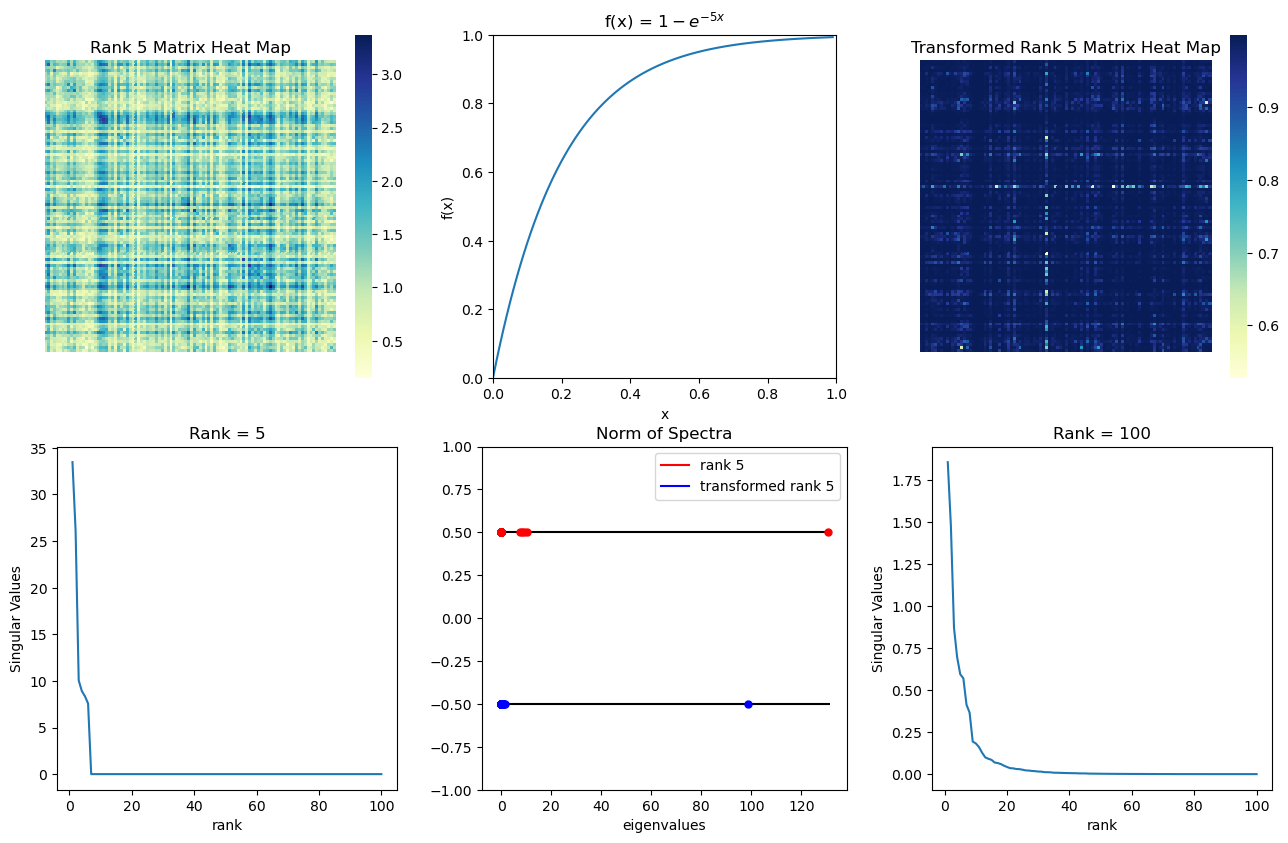

In [4]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 100 

plt.subplot(2,3,1)
sns.heatmap(rank_5_matrix, 
            xticklabels=False, 
            yticklabels=False, 
            cmap="YlGnBu", 
            square = True).set_title("Rank 5 Matrix Heat Map")

plt.subplot(2,3,2)

plt.plot(x, f_x)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("f(x) = $1 - e^{-5x}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.gca().set_aspect(aspect = 1, adjustable='box')

plt.subplot(2,3,3)

sns.heatmap(transformed_rank_5_matrix, 
            xticklabels=False, 
            yticklabels=False, 
            cmap="YlGnBu", 
            square = True).set_title("Transformed Rank 5 Matrix Heat Map")

plt.subplot(2,3,4)
plot_normalized_svd(rank_5_matrix)

plt.subplot(2,3,5)
plot_spectra(norm_rank_5, 
             norm_transformed_rank_5, 
             "Norm of Spectra", 
             "rank 5", 
             "transformed rank 5")

plt.subplot(2,3,6)
plot_normalized_svd(transformed_rank_5_matrix)


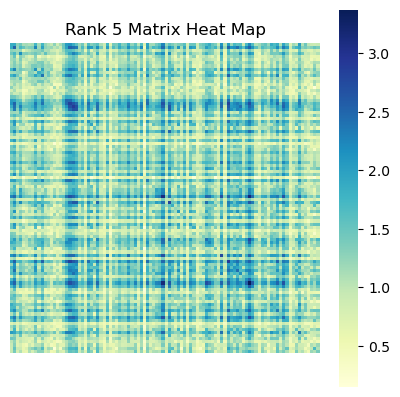

In [5]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 100 

sns_plot_1 = sns.heatmap(rank_5_matrix, 
                        xticklabels=False, 
                        yticklabels=False, 
                        cmap="YlGnBu", 
                        square = True).set_title("Rank 5 Matrix Heat Map").get_figure() 
sns_plot_1.savefig("./figures/figure_1a.png", bbox_inches='tight')

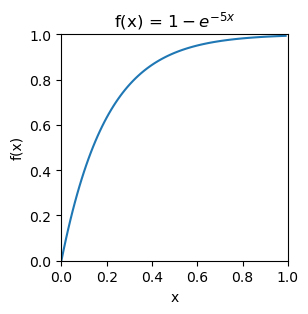

In [6]:
plt.rcParams['figure.figsize'] = [3,3]
plt.rcParams['figure.dpi'] = 100 

plt.plot(x, f_x)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("f(x) = $1 - e^{-5x}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.gca().set_aspect(aspect = 1, adjustable='box')

plt.savefig("./figures/figure_1b.png", bbox_inches='tight')

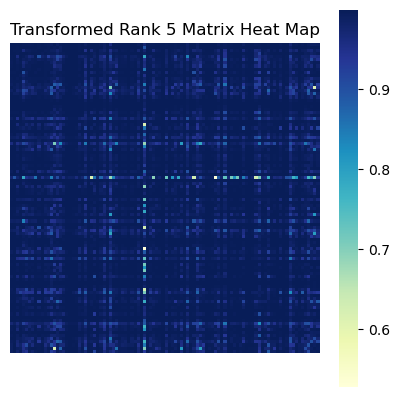

In [7]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 100 


sns_plot_2 = sns.heatmap(transformed_rank_5_matrix, 
                        xticklabels=False, 
                        yticklabels=False, 
                        cmap="YlGnBu", 
                        square = True).set_title("Transformed Rank 5 Matrix Heat Map").get_figure() 

sns_plot_2.savefig("./figures/figure_1c.png", bbox_inches='tight')


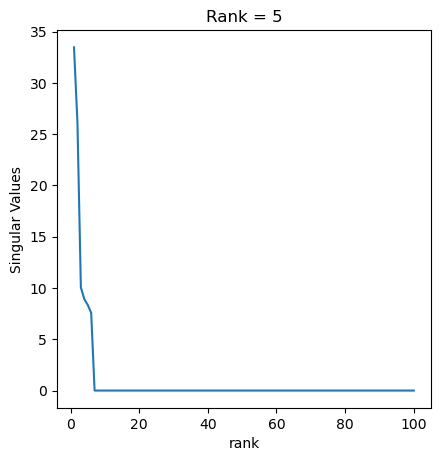

In [8]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 100 


plot_normalized_svd(rank_5_matrix)

plt.savefig("./figures/figure_1d.png", bbox_inches='tight')

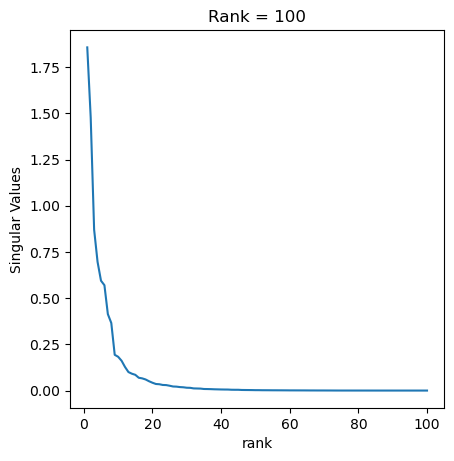

In [9]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 100 

plot_normalized_svd(transformed_rank_5_matrix)

plt.savefig("./figures/figure_1e.png", bbox_inches='tight')